In [1]:
import fastf1 as ff1
from fastf1 import plotting
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd
from fastf1.core import Laps
from datetime import datetime
from matplotlib.collections import LineCollection
import matplotlib as mpl
from fastf1 import utils

In [2]:
ff1.plotting.setup_mpl()

In [3]:
year=int(input('Enter Year'))
gp=input('Enter the Grand Prix Location')
sessiontypechoice=int(input('Enter 1 for qualifying or 2 for race'))
if sessiontypechoice == 1:
    sessiontype='Q'
elif sessiontypechoice == 2:
    sessiontype='R'
else:
    print("Unknown choice")

In [4]:
session = ff1.get_session(year, gp,sessiontype)
session.load()

api         WARNING 	

NO CACHE! Api caching has not been enabled! 
	It is highly recommended to enable this feature for much faster data loading!
	Use `fastf1.Cache.enable_cache('path/to/cache/')`

core           INFO 	Loading data for Canadian Grand Prix - Qualifying [v2.2.8]
api            INFO 	Fetching driver list...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api         WARNING 	Driver  1: Encountered 1 timing integrity error(s) near lap(s): [14]
api         WARNING 	Driver 77: Encountered 1 timing integrity error(s) near lap(s): [14]
api            INFO 	Fetching timing app data...
core           INFO 	Processing timing data...
api            INFO 	Fetching session status data...
api            INFO 	Fetching track status data...
api            INFO 	Fetching car data...
api            INFO 	Parsing car data...
api            INFO 	Fetching position data...
api            INFO 	Parsing position data...
api            INFO 	Fetching w

In [5]:
choicedrivers=int(input("Enter 1 for the comparision between top 2 drivers \n Enter 2 for the comparision between 2 specified drivers"))

In [6]:
if choicedrivers==1: 
    quali_results=session.results
    quali_results=quali_results[['DriverNumber','BroadcastName','Abbreviation','TeamName','Position','Q1','Q2','Q3']]
    quali_results[['Abbreviation']]
    x=quali_results['Abbreviation'].iloc[0]
    y=quali_results['Abbreviation'].iloc[1]
    driver1=x
    driver2=y

else:
    driver1=input("Enter the first driver initials")
    driver2=input("Enter the second driver initials")


In [7]:
driver1=driver1.upper()
driver2=driver2.upper()

In [8]:
laps=session.load_laps(with_telemetry=True)

laps_1=laps.pick_driver(driver1)
laps_2=laps.pick_driver(driver2)
fastest_1=laps_1.pick_fastest()
fastest_2=laps_2.pick_fastest()

c:\Users\Rajup\AppData\Local\Programs\Python\Python310\lib\site-packages\fastf1\core.py:1127: FutureWarning: `Session.load_laps` is deprecated and will beremoved in a future version.
Use `Session.load` instead.
  warnings.warn("`Session.load_laps` is deprecated and will be"
core           INFO 	Loading data for Canadian Grand Prix - Qualifying [v2.2.8]
api            INFO 	Fetching driver list...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api         WARNING 	Driver  1: Encountered 1 timing integrity error(s) near lap(s): [14]
api         WARNING 	Driver 77: Encountered 1 timing integrity error(s) near lap(s): [14]
api            INFO 	Fetching timing app data...
core           INFO 	Processing timing data...
api            INFO 	Fetching session status data...
api            INFO 	Fetching track status data...
api            INFO 	Fetching car data...
api            INFO 	Parsing car data...
api            INFO 	Fetching position data...
a

In [9]:
laps_1

,Time,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,...,IsPersonalBest,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
30,0 days 00:18:11.614000,14,0 days 00:02:04.209000,1,1,0 days 00:16:08.860000,NaT,0 days 00:00:33.415000,0 days 00:00:34.533000,0 days 00:00:56.261000,...,False,WET,1.0,True,0 days 00:16:08.860000,Alpine,ALO,1,False,2022-06-18 20:01:10.809
31,0 days 00:19:48.480000,14,0 days 00:01:36.866000,2,1,NaT,NaT,0 days 00:00:28.750000,0 days 00:00:31.278000,0 days 00:00:36.838000,...,False,WET,2.0,True,0 days 00:18:11.614000,Alpine,ALO,1,True,2022-06-18 20:03:13.563
32,0 days 00:21:28.174000,14,0 days 00:01:39.694000,3,1,NaT,NaT,0 days 00:00:27.569000,0 days 00:00:30.846000,0 days 00:00:41.279000,...,False,WET,3.0,True,0 days 00:19:48.480000,Alpine,ALO,1,True,2022-06-18 20:04:50.429
33,0 days 00:23:05.791000,14,0 days 00:01:37.617000,4,1,NaT,NaT,0 days 00:00:27.769000,0 days 00:00:32.620000,0 days 00:00:37.228000,...,False,WET,4.0,True,0 days 00:21:28.174000,Alpine,ALO,1,True,2022-06-18 20:06:30.123
34,0 days 00:24:44.492000,14,0 days 00:01:38.701000,5,1,NaT,NaT,0 days 00:00:27.348000,0 days 00:00:30.006000,0 days 00:00:41.347000,...,False,WET,5.0,True,0 days 00:23:05.791000,Alpine,ALO,1,True,2022-06-18 20:08:07.740
35,0 days 00:26:17.628000,14,0 days 00:01:33.136000,6,1,NaT,NaT,0 days 00:00:27.053000,0 days 00:00:30.312000,0 days 00:00:35.771000,...,False,WET,6.0,True,0 days 00:24:44.492000,Alpine,ALO,1,True,2022-06-18 20:09:46.441
36,0 days 00:28:06.440000,14,0 days 00:01:48.812000,7,1,NaT,NaT,0 days 00:00:28.724000,0 days 00:00:32.226000,0 days 00:00:47.862000,...,False,WET,7.0,True,0 days 00:26:17.628000,Alpine,ALO,1,True,2022-06-18 20:11:19.577
37,0 days 00:29:44.099000,14,0 days 00:01:37.659000,8,1,NaT,NaT,NaT,0 days 00:00:31.789000,0 days 00:00:37.146000,...,False,WET,8.0,True,0 days 00:28:06.440000,Alpine,ALO,1,False,2022-06-18 20:13:08.389
38,0 days 00:31:22.395000,14,0 days 00:01:38.296000,9,1,NaT,NaT,0 days 00:00:27.392000,0 days 00:00:30.915000,0 days 00:00:39.989000,...,False,WET,9.0,True,0 days 00:29:44.099000,Alpine,ALO,1,True,2022-06-18 20:14:46.048
39,0 days 00:32:54.672000,14,0 days 00:01:32.277000,10,1,NaT,NaT,0 days 00:00:26.846000,0 days 00:00:29.872000,0 days 00:00:35.559000,...,False,WET,10.0,True,0 days 00:31:22.395000,Alpine,ALO,2,True,2022-06-18 20:16:24.344


In [10]:
total_race1=laps_1.get_car_data().add_distance()
total_race2=laps_2.get_car_data().add_distance()

In [11]:
driver1_telemetry=fastest_1.get_car_data().add_distance()
driver2_telemetry=fastest_2.get_car_data().add_distance()

In [12]:
driver1_color=plotting.team_color(fastest_1['Team'])
driver2_color=plotting.team_color(fastest_2['Team'])
if(driver1_color==driver2_color):
    driver2_color='#FFFFFF'
    

In [13]:

#quali_results

In [14]:
#delta_ms=round(delta.total_seconds()*1000)
nameevent=session.event['OfficialEventName']

In [15]:
nameevent

'FORMULA 1 AWS GRAND PRIX DU CANADA 2022'

In [16]:
driver1_telemetry

,Date,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Time,SessionTime,Distance
0,2022-06-18 21:11:49.316,10706,281,7,100,False,9,car,0 days 00:00:00.275000,0 days 01:26:47.367000,21.465278
1,2022-06-18 21:11:49.596,10740,282,7,100,False,9,car,0 days 00:00:00.555000,0 days 01:26:47.647000,43.398611
2,2022-06-18 21:11:49.916,10836,286,7,100,False,9,car,0 days 00:00:00.875000,0 days 01:26:47.967000,68.820833
3,2022-06-18 21:11:50.196,10147,280,7,5,True,9,car,0 days 00:00:01.155000,0 days 01:26:48.247000,90.598611
4,2022-06-18 21:11:50.396,10638,262,7,0,True,9,car,0 days 00:00:01.355000,0 days 01:26:48.447000,105.154167
...,...,...,...,...,...,...,...,...,...,...,...
305,2022-06-18 21:13:09.836,11554,268,6,100,False,9,car,0 days 00:01:20.795000,0 days 01:28:07.887000,4217.783333
306,2022-06-18 21:13:10.156,11668,271,6,100,False,9,car,0 days 00:01:21.115000,0 days 01:28:08.207000,4241.872222
307,2022-06-18 21:13:10.476,11868,274,6,100,False,9,car,0 days 00:01:21.435000,0 days 01:28:08.527000,4266.227778
308,2022-06-18 21:13:10.676,11908,276,6,100,False,9,car,0 days 00:01:21.635000,0 days 01:28:08.727000,4281.561111


In [17]:
utils.delta_time(fastest_1, fastest_2)
delta_time, ref_tel, compare_tel = utils.delta_time(fastest_1, fastest_2)

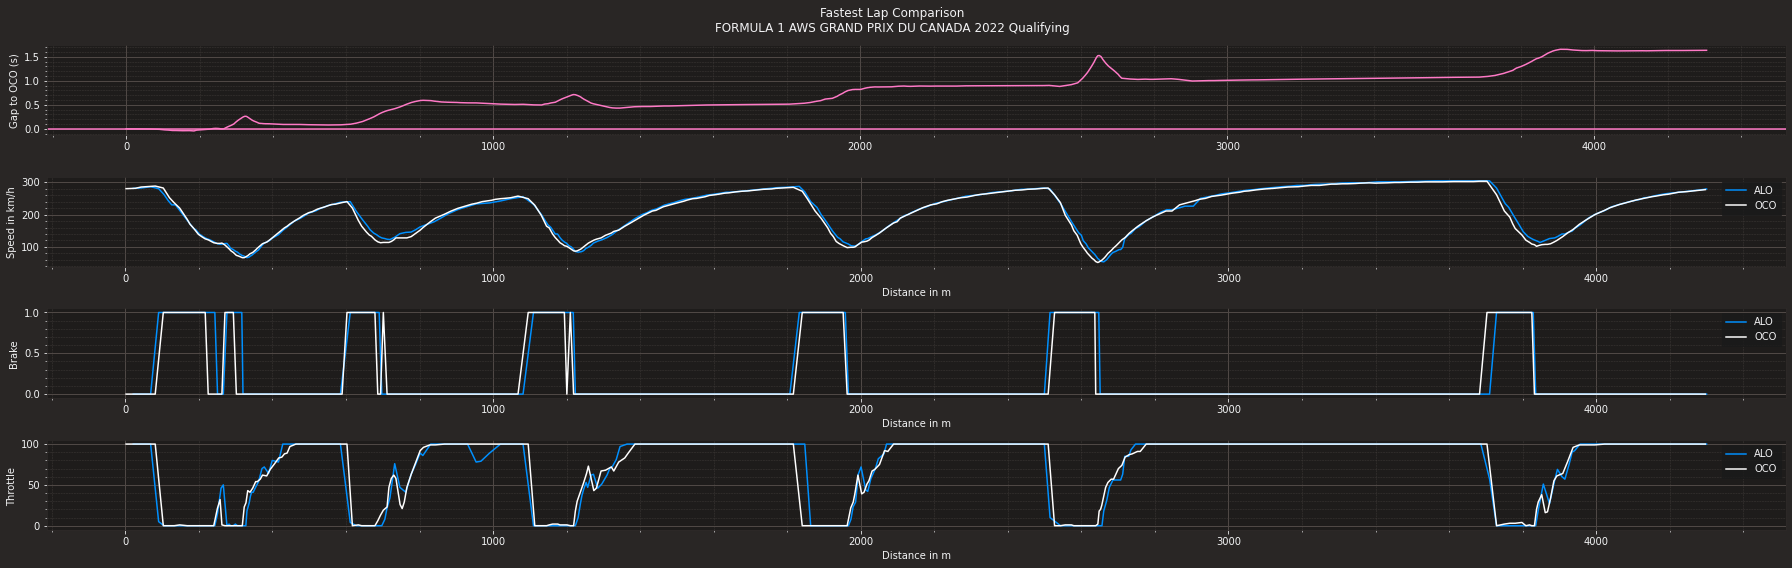

In [18]:
fig, ax = plt.subplots(4)
ax[0].plot(ref_tel['Distance'], delta_time)
ax[0].axhline(0)
ax[0].set(ylabel=f"Gap to {fastest_2.Driver} (s)")

ax[1].plot(driver1_telemetry['Distance'], driver1_telemetry['Speed'], color=driver1_color, label=driver1)
ax[1].plot(driver2_telemetry['Distance'], driver2_telemetry['Speed'], color=driver2_color, label=driver2)

ax[1].set_xlabel('Distance in m')
ax[1].set_ylabel('Speed in km/h')

ax[1].legend()

ax[2].plot(driver1_telemetry['Distance'], driver1_telemetry['Brake'], color=driver1_color, label=driver1)
ax[2].plot(driver2_telemetry['Distance'], driver2_telemetry['Brake'], color=driver2_color, label=driver2)

ax[2].set_xlabel('Distance in m')
ax[2].set_ylabel('Brake ')

ax[2].legend()

ax[3].plot(driver1_telemetry['Distance'], driver1_telemetry['Throttle'], color=driver1_color, label=driver1)
ax[3].plot(driver2_telemetry['Distance'], driver2_telemetry['Throttle'], color=driver2_color, label=driver2)

ax[3].set_xlabel('Distance in m')
ax[3].set_ylabel('Throttle ')

ax[3].legend()

plt.suptitle(f"Fastest Lap Comparison  \n"
             f"{nameevent} {session.name}  ")
fig.set_size_inches(25, 8)
plt.savefig(nameevent +' '+session.name+'telecomparision.jpg')
plt.tight_layout()
plt.show()

In [19]:
fastest_2.Sector1Time

Timedelta('0 days 00:00:23.855000')

In [20]:
x=fastest_1.telemetry['X']
y=fastest_1.telemetry['Y']
colormap = mpl.cm.plasma
color = fastest_1.telemetry['Speed'] 

In [21]:
telemetrydf=pd.DataFrame(fastest_1.telemetry)

In [22]:

chunksize =  int(telemetrydf.shape[0] / 3)

chunks = [telemetrydf[i:i+chunksize] for i in range(0,telemetrydf.shape[0],chunksize)]

In [23]:
chunks[0]['X']

2      3364
3      3380
4      3381
5      3392
6      3395
       ... 
209   -1075
210   -1090
211   -1117
212   -1132
213   -1140
Name: X, Length: 212, dtype: int64

In [24]:
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

In [25]:
points

array([[[3364,  826]],

       [[3380,  699]],

       [[3381,  678]],

       ...,

       [[3337, 1021]],

       [[3353,  909]],

       [[3365,  820]]], dtype=int64)

In [26]:
one=fastest_1.LapTime
two=fastest_2.LapTime
if one<two:
    min=one
    max=two
else:
    min=two
    max=one
delta=max-min

deltams=round(delta.total_seconds()*1000)

In [27]:
#conversion of microseconds and seconds
ms=int(delta.microseconds)
gap=ms/1000000
print(gap)
seconds=delta.seconds
seconds + gap

gap = seconds + gap

0.585


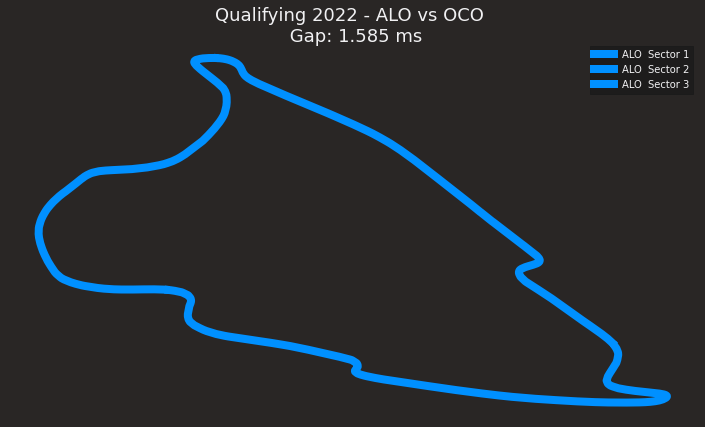

In [29]:
fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(12, 6.75))
fig.suptitle(f'{session.name} {year} - {fastest_1.Driver} vs {fastest_2.Driver} \n Gap: {gap} ms', size=18, y=0.97)

# Adjust margins and turn of axis
#fastest1 alo fastest2 sai
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')
if fastest_1.Sector1Time<fastest_2.Sector1Time:
    ax.plot(chunks[0]['X'], chunks[0]['Y'], color=driver1_color, linestyle='-', label=driver1+"  Sector 1", linewidth=8, zorder=0)
else:
    ax.plot(chunks[0]['X'], chunks[0]['Y'], color=driver2_color, linestyle='-',label=driver2+"  Sector 1", linewidth=8, zorder=0)
if fastest_1.Sector2Time<fastest_2.Sector2Time:
    ax.plot(chunks[1]['X'], chunks[1]['Y'], color=driver1_color, linestyle='-', label=driver1+"  Sector 2",linewidth=8, zorder=0)
else:
    ax.plot(chunks[1]['X'], chunks[1]['Y'], color=driver2_color, linestyle='-', label=driver2+"  Sector 2",linewidth=8, zorder=0)
if fastest_1.Sector3Time<fastest_2.Sector3Time:
    ax.plot(chunks[2]['X'], chunks[2]['Y'], color=driver1_color, linestyle='-',label=driver1+"  Sector 3", linewidth=8, zorder=0)
else:
    ax.plot(chunks[2]['X'], chunks[2]['Y'], color=driver2_color, linestyle='-',label=driver2+"  Sector 3    ", linewidth=8, zorder=0)

ax.legend()

#cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
#normlegend = mpl.colors.Normalize(vmin=color.min(), vmax=color.max())
#legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=colormap, orientation="horizontal")

plt.show()

In [30]:
# testing code
# print("ALO - Sector 1 time = "+str(fastest_1.Sector1Time))
# print("SAI - Sector 1 time = ",fastest_2.Sector1Time)
# print("ALO - Sector 2 time = ",fastest_1.Sector2Time)
# print("SAI - Sector 2 time = ",fastest_2.Sector2Time)
# print("ALO - Sector 3 time = ",fastest_1.Sector3Time)
# print("SAI - Sector 3 time = ",fastest_2.Sector3Time)


ALO - Sector 1 time = 0 days 00:00:23.464000
SAI - Sector 1 time =  0 days 00:00:23.855000
ALO - Sector 2 time =  0 days 00:00:26.288000
SAI - Sector 2 time =  0 days 00:00:26.667000
ALO - Sector 3 time =  0 days 00:00:32.192000
SAI - Sector 3 time =  0 days 00:00:33.007000


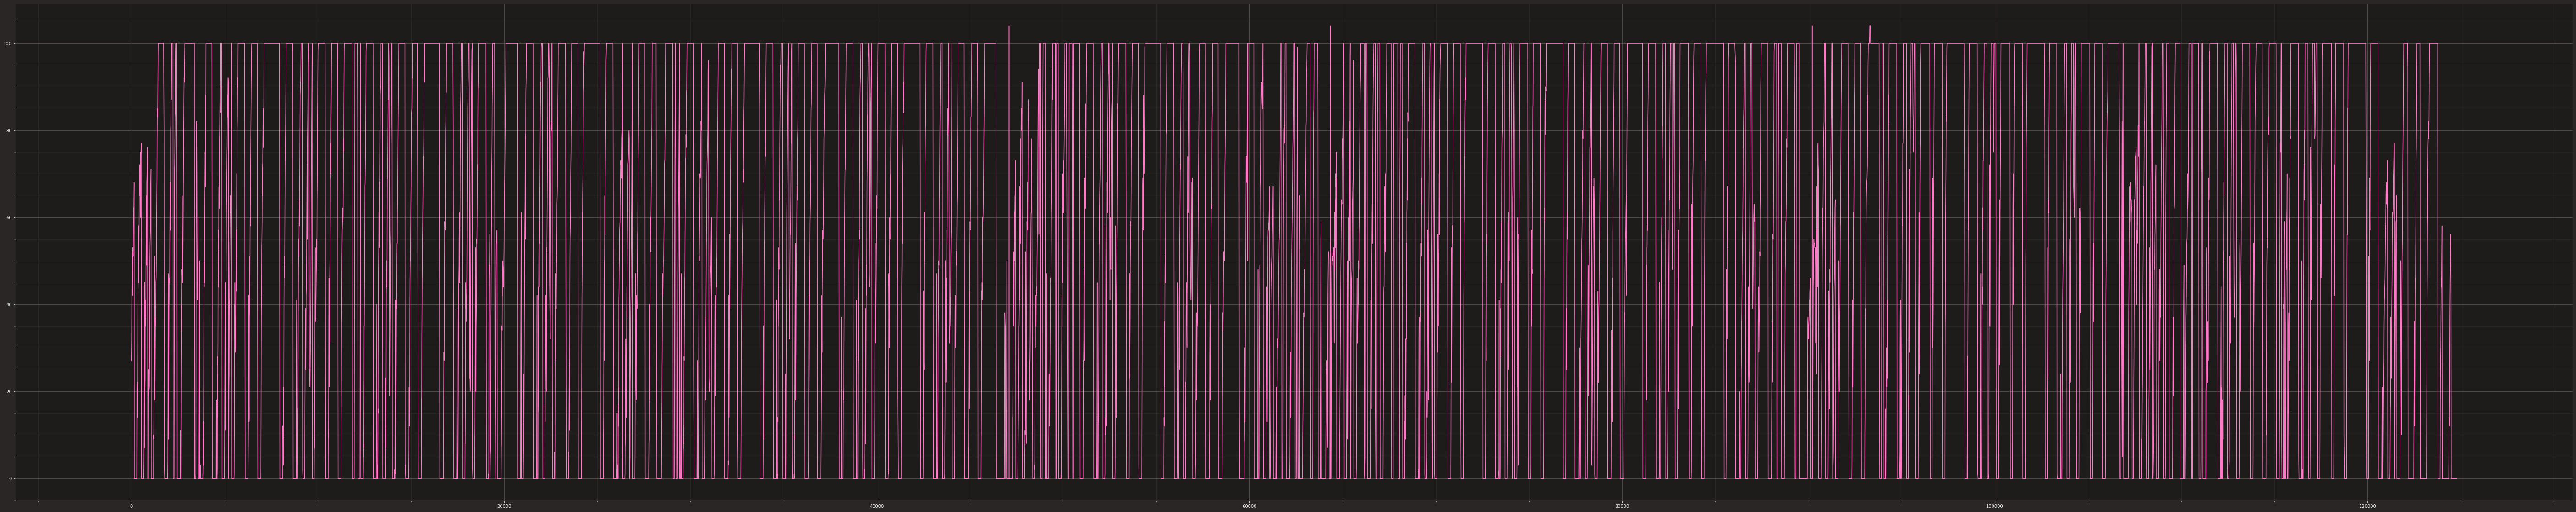

In [31]:
fig, ax = plt.subplots()
ax.plot(total_race1['Distance'], total_race1['Throttle'])
fig.set_size_inches(100, 20)
plt.show()

In [32]:
seconds=delta.seconds
seconds + gap

gap = seconds + gap